In [2]:
import pandas
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
from csv import reader
from mpl_toolkits.basemap import Basemap

In [3]:
csv_file_name = 'sensor_positions.csv'
columns = ['sensor_name', 'latitude', 'longitude', 'region']
sensor_df = pd.DataFrame(columns=columns, index=[0])

with open('./data/' + csv_file_name, 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        data = {columns[0]: row[1], columns[1]: float(row[0].split(' ')[0].replace('(', '')), columns[2]: float(row[0].split(' ')[1].replace(')', '')), columns[3] : ''}
        data_df = pd.DataFrame(data, columns=columns, index=[0])
        sensor_df = pd.concat([sensor_df, data_df])

sensor_df = sensor_df.dropna()

In [4]:
folders = ['region_1_mustamäe_kristiine', 'region_2_data_kesklinn', 'region_3_kadriorg_lasnamäe', 'region_4_ülemiste']

for folder in folders:
    for file in os.listdir('data/' + folder):
        sensor_name = file.split('-')[0]
        region = int(folder.split('_')[1])
        sensor_df.loc[sensor_df.sensor_name==sensor_name, 'region'] = region

print(sensor_df.head())

  sensor_name   latitude  longitude region
0        2004  24.726405  59.398497      2
0        2013  24.748805  59.434405      2
0        2015  24.751089  59.434361      2
0        2018  24.726473  59.396803      1
0        201A  24.744596  59.441991      2


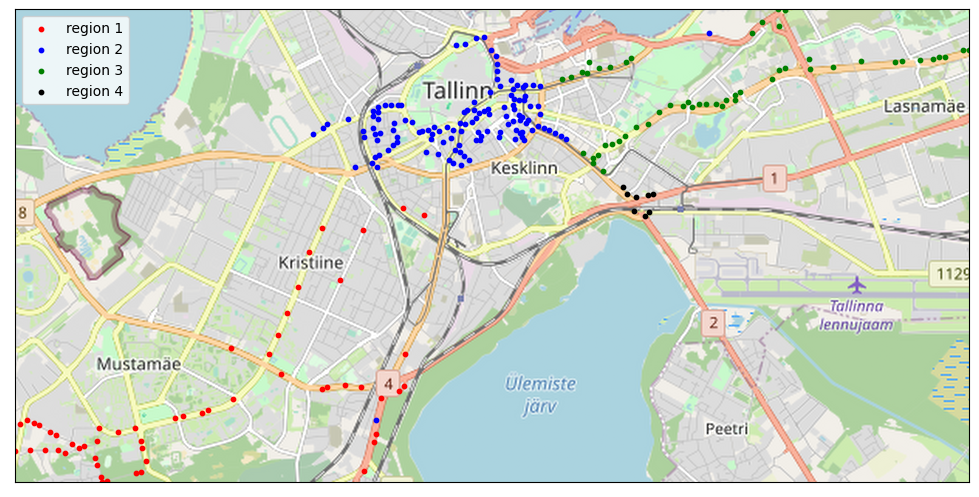

In [76]:
tallinn_map = plt.imread('data/map.png')

image_width = tallinn_map.shape[1] / 100 * 2
image_height = tallinn_map.shape[0] / 100 * 2
fig, ax = plt.subplots(figsize=(image_width, image_height))

lon_min = sensor_df['longitude'].min()
lon_max = sensor_df['longitude'].max()
lat_min = sensor_df['latitude'].min()
lat_max = sensor_df['latitude'].max()

colors = ['red', 'blue', 'green', 'black']
regions = sensor_df['region'].sort_values().unique()

# Create basemap with specified boundaries
m = Basemap(projection='merc', resolution='h',
            llcrnrlon=lat_min, llcrnrlat=lon_min,
            urcrnrlon=lat_max, urcrnrlat=lon_max)
m.imshow(tallinn_map, interpolation='lanczos', origin='upper')

# Plot sensor locations
for i, region in enumerate(regions):
    x, y = m(sensor_df[sensor_df['region'] == region]['latitude'].values, sensor_df[sensor_df['region'] == region]['longitude'].values)
    m.scatter(x, y, c=colors[i], marker='o', s=10)

regions = ["region " + str(r) for r in regions]
ax.legend(regions)

plt.show()